# Task 1 counting the steps

#### Number of steps equals lines of code (in the algorithm)

Vary the size of the input and record
the number of steps. \
Plot the number of steps as a function the input size (n)
to confirm that the plotted functions match the asymptotic running time shown
in the Table.

In [8]:
import matplotlib.pyplot as plt
import random

# Initialize arrays for sorting algorithms
arr5 = [random.randint(0, 100) for i in range(5)]
arr20 = [random.randint(0, 100) for i in range(10)]
arr100 = [random.randint(0, 100) for i in range(100)]
arr500 = [random.randint(0, 100) for i in range(500)]
arr1000 = [random.randint(0, 100) for i in range(1000)]
arr25000 = [random.randint(0, 100) for i in range(25000)]
arrs = [arr5, arr20, arr100, arr500, arr1000, arr25000]

## Insertion Sort

In [9]:
def insertion_sort(arr):
    n = len(arr)
    num_steps = 0

    # If the array has 0 or 1 element, it is already sorted, so return
    if n <= 1:
        return num_steps, n
    
    # Iterate over the array starting from the second element
    for i in range(1, n):
        num_steps += 2
        # Store the current element as the key to be inserted in the right position
        key = arr[i]
        j = i-1
        # Move elements greater than key one position ahead
        while j >= 0 and key < arr[j]:
            num_steps += 2
            # Shift elements to the right
            arr[j+1] = arr[j]
            j -= 1
        # Insert the key in the right position
        num_steps += 1
        arr[j+1] = key

     # Return the number of steps and the length of the array
    return num_steps, n


Array length: 5, Number of steps: 24, Constant factor: 0.96
Array length: 10, Number of steps: 83, Constant factor: 0.83
Array length: 100, Number of steps: 4697, Constant factor: 0.4697
Array length: 500, Number of steps: 125861, Constant factor: 0.503444
Array length: 1000, Number of steps: 504631, Constant factor: 0.504631
Array length: 25000, Number of steps: 308730589, Constant factor: 0.4939689424


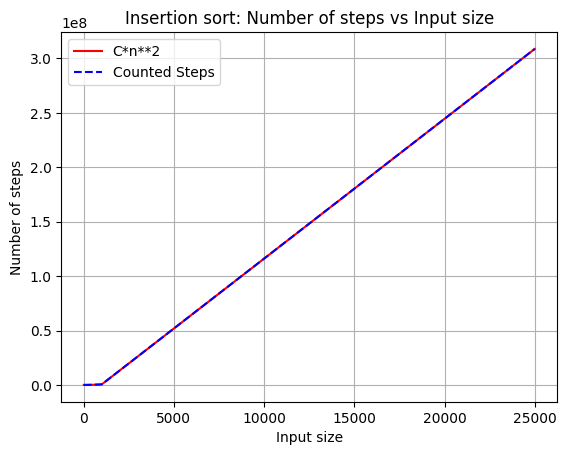

In [10]:
steps = []
input_sizes = []
actual_array = []

for arr in arrs:
    num_steps, n = insertion_sort(arr)
    steps.append(num_steps)
    input_sizes.append(n)
    constant_factor = num_steps / n**2
    actual = constant_factor * n**2
    actual_array.append(actual)
    print(f"Array length: {n}, Number of steps: {num_steps}, Constant factor: {constant_factor}")

plt.plot(input_sizes, actual_array, label="C*n**2", color='red')
plt.plot(input_sizes, steps, label="Counted Steps",color='blue', linestyle='--')
plt.xlabel('Input size')
plt.ylabel('Number of steps')
plt.title('Insertion sort: Number of steps vs Input size')
plt.legend()
plt.grid(True)
plt.show()


## Merge Sort

## Heap Sort

In [11]:
def heapify(arr, n, i):
    num_steps = 0
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[i] < arr[left]:
        largest = left
        num_steps += 1

    if right < n and arr[largest] < arr[right]:
        largest = right
        num_steps += 1

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        num_steps += heapify(arr, n, largest)

    return num_steps

def heapsort(arr):
    n = len(arr)
    num_steps = 0

    # Build a max heap
    for i in range(n//2 - 1, -1, -1):
        num_steps += heapify(arr, n, i)

    # Extract elements one by one
    for i in range(n-1, 0, -1):
        num_steps += 3
        arr[i], arr[0] = arr[0], arr[i]
        num_steps += heapify(arr, i, 0)

    return num_steps, n

Array length: 5, Number of steps: 21, Constant factor: 1.808841543908251
Array length: 10, Number of steps: 55, Constant factor: 1.6556649761518965
Array length: 100, Number of steps: 1062, Constant factor: 1.59846927697574
Array length: 500, Number of steps: 6934, Constant factor: 1.5467693131680864
Array length: 1000, Number of steps: 15066, Constant factor: 1.5117726382245134
Array length: 25000, Number of steps: 483558, Constant factor: 1.3239422307375863


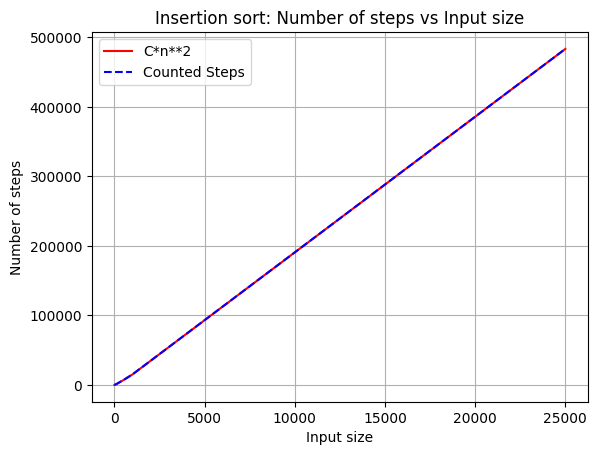

In [12]:
import math 
steps = []
input_sizes = []
actual_array = []

for arr in arrs:
    num_steps, n = heapsort(arr)
    steps.append(num_steps)
    input_sizes.append(n)
    constant_factor = num_steps / (n * math.log(n, 2))
    actual = constant_factor * n * math.log(n, 2)
    actual_array.append(actual)
    print(f"Array length: {n}, Number of steps: {num_steps}, Constant factor: {constant_factor}")

plt.plot(input_sizes, actual_array, label="C*n**2", color='red')
plt.plot(input_sizes, steps, label="Counted Steps",color='blue', linestyle='--')
plt.xlabel('Input size')
plt.ylabel('Number of steps')
plt.title('Insertion sort: Number of steps vs Input size')
plt.legend()
plt.grid(True)
plt.show()

## Quicksort